### Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

### Visualizar o dataset

In [3]:
#To visualize the whole grid
pd.options.display.max_columns = 999
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Distribuição da variável : Purchase

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Quantidade de distribuição')

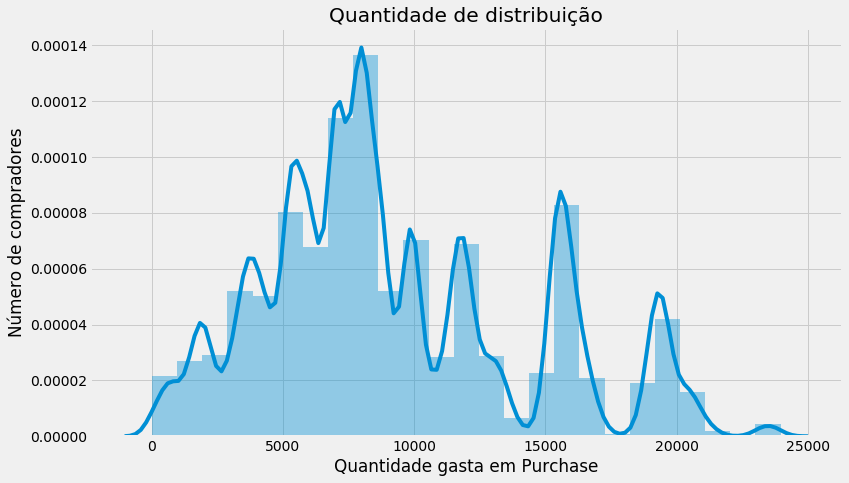

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Quantidade gasta em Purchase")
plt.ylabel("Número de compradores")
plt.title("Quantidade de distribuição")

#### Curtose é uma medida de dispersão que caracteriza o "achatamento" da curva da função de distribuição. É definida por: Se , então a função de distribuição tem o mesmo achatamento da distribuição normal, chamamos essas funções de mesócurticas.

In [5]:
print ("Inclinação é:", train.Purchase.skew())
print("Curtose: %f" % train.Purchase.kurt())

Inclinação é: 0.6001400037087128
Curtose: -0.338378


### Variáveis númericas

In [6]:
numeric = train.select_dtypes(include=[np.number])
numeric.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

### Distribuição da variável Occupation

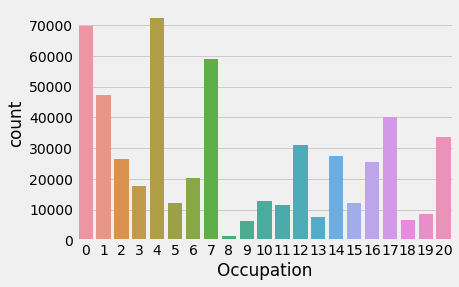

In [7]:
sns.countplot(train.Occupation)

### Distribuição da variável Marital_Status

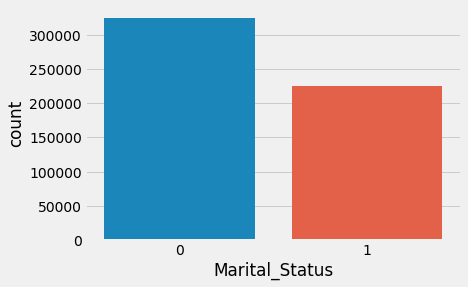

In [8]:
sns.countplot(train.Marital_Status)

### Distribuição da variável  Product_Category_1

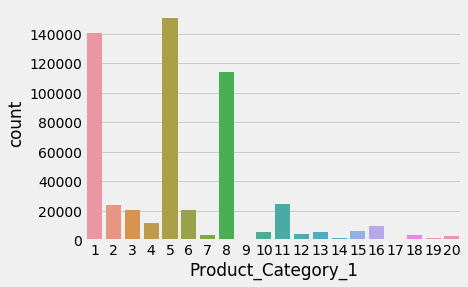

In [9]:
sns.countplot(train.Product_Category_1)

### Distribuição da variável  Product_Category_2

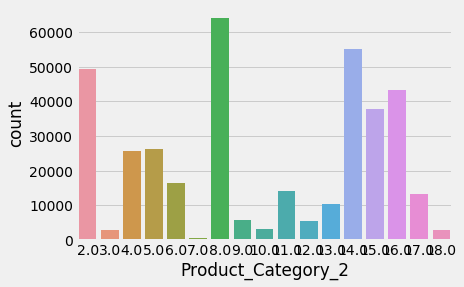

In [10]:
sns.countplot(train.Product_Category_2)

### Distribuição da variável  Product_Category_3

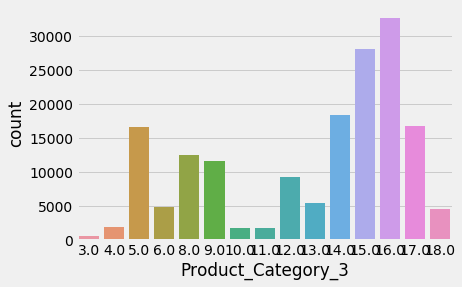

In [11]:
sns.countplot(train.Product_Category_3)

### Correlação entre variáveis númericas

In [12]:
corr = numeric.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


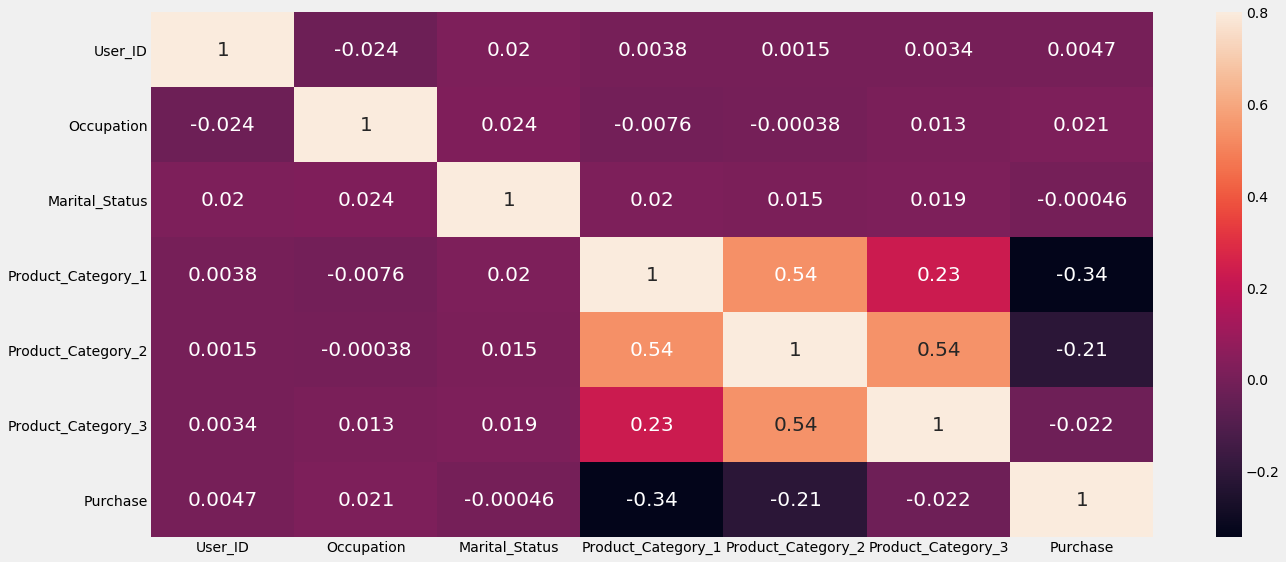

In [13]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

### Variáveis categoricas

### Distribuição da variável Gender

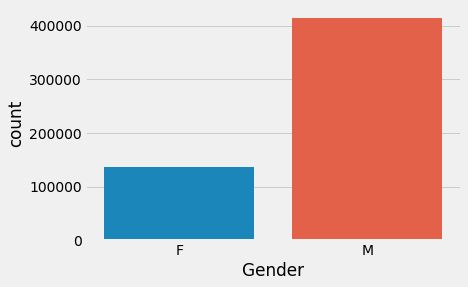

In [14]:
sns.countplot(train.Gender)

### Distribuição da variável  Age

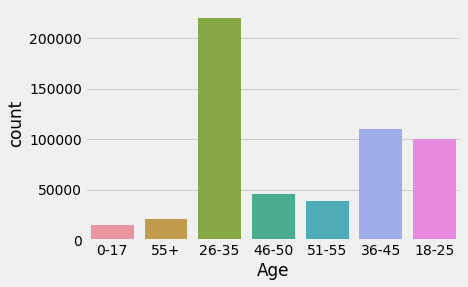

In [15]:
sns.countplot(train.Age)

### Distribuição da variável City_Category

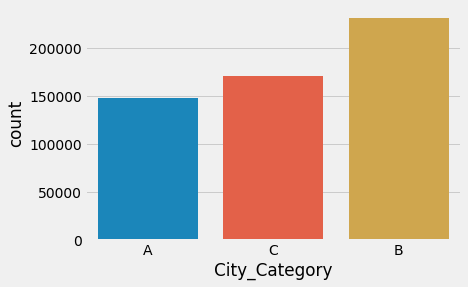

In [16]:
sns.countplot(train.City_Category)

### Distribuição da variável  Stay_In_Current_City_Years

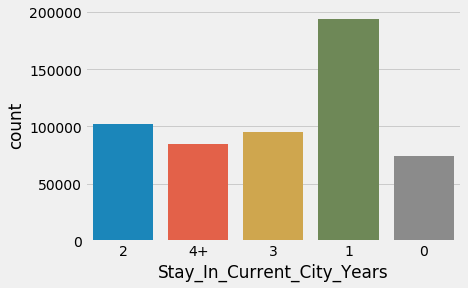

In [17]:
sns.countplot(train.Stay_In_Current_City_Years)

### Análise das variáveis Occupation e Purchase

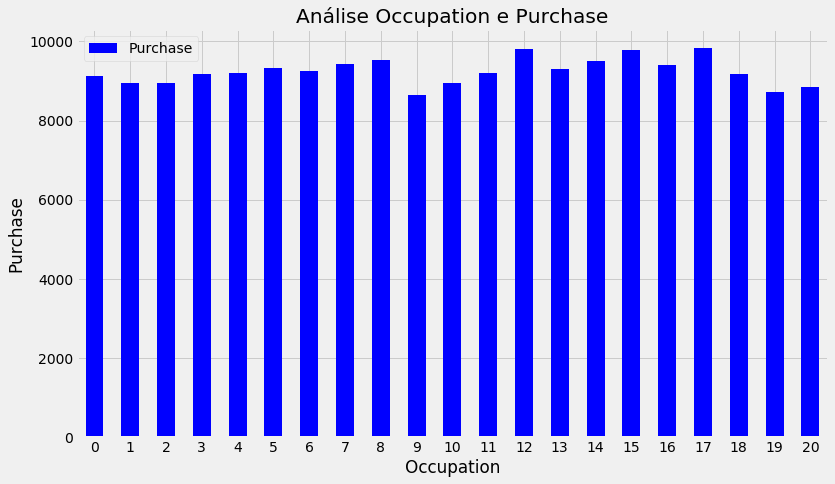

In [18]:
Occupation_pivot = train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Análise Occupation e Purchase")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis Marital_Status e Purchase 

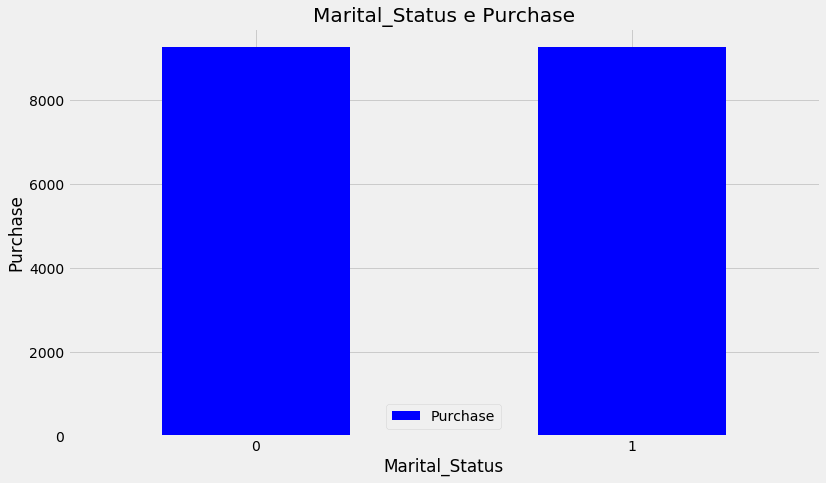

In [19]:
Occupation_pivot = train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status e Purchase")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis Product_category_1 e Purchase 

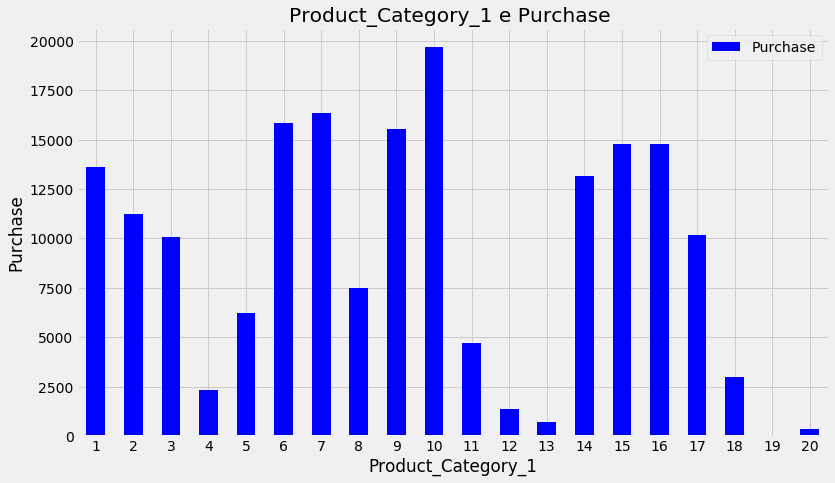

In [35]:
Occupation_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 e Purchase ")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis Gender e Purchase 

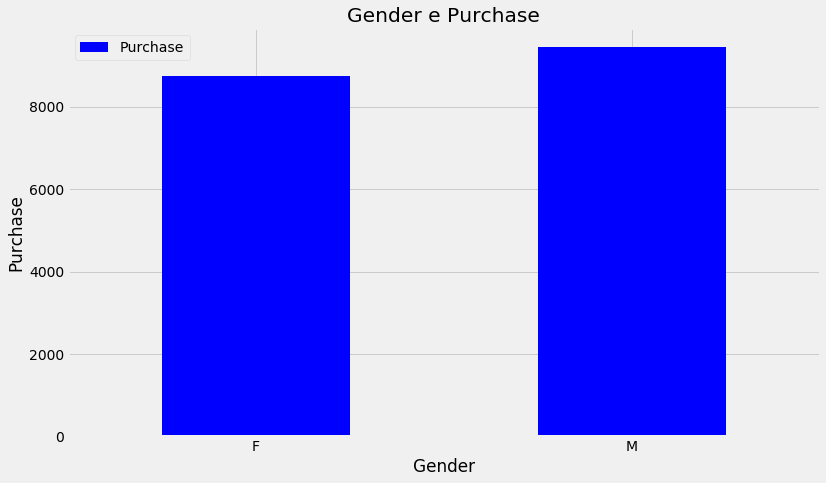

In [36]:
Occupation_pivot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender e Purchase")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis Age e Purchase 

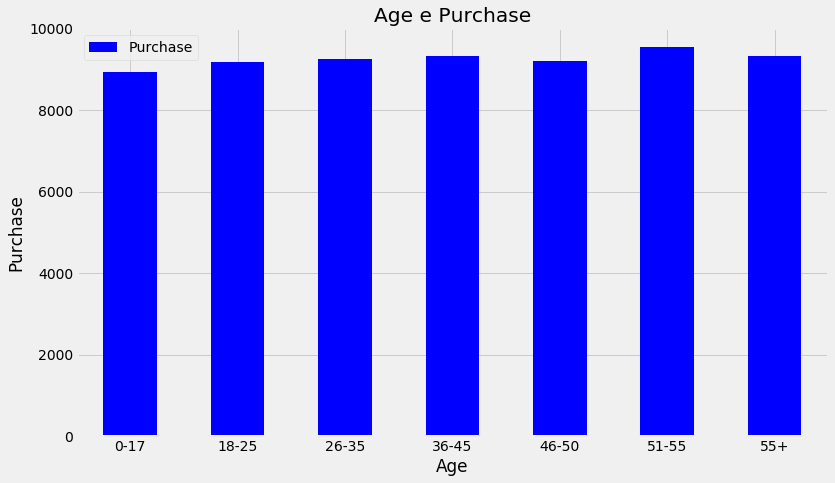

In [37]:
Occupation_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age e Purchase")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis  City_Category e Purchase analysis

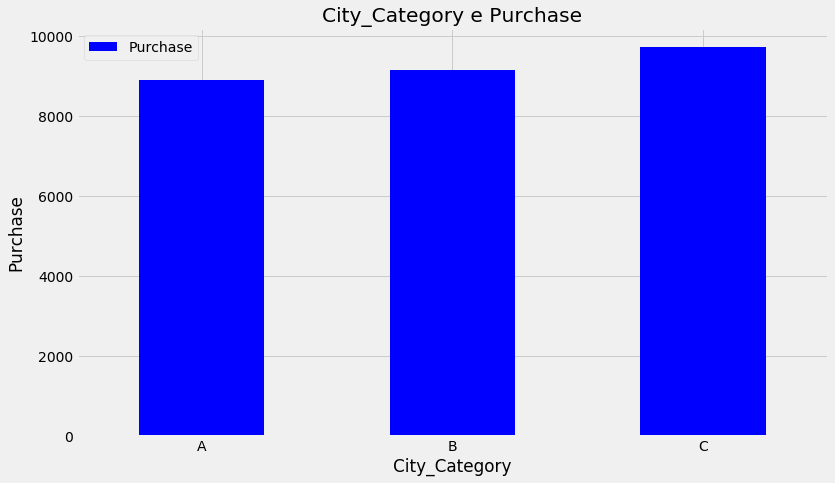

In [38]:
Occupation_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category e Purchase")
plt.xticks(rotation=0)
plt.show()

### Análise das variáveis  Stay_In_Current_City_Years e Purchase

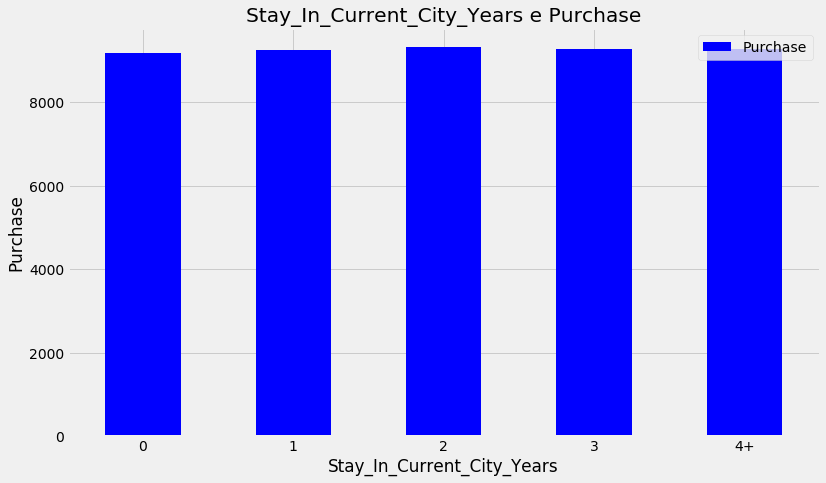

In [39]:
Occupation_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years e Purchase")
plt.xticks(rotation=0)
plt.show()

###  Train e Test Dataset

In [40]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index = True, sort = False)
print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


### Procurando por valores nulos

In [41]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [42]:
data["Product_Category_2"]= data["Product_Category_2"].fillna(-2.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [43]:
data['Product_Category_3']= data['Product_Category_3'].fillna(-2.0).astype('float')
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [44]:
#Get index of all columns with product_category_1 equal 19 or 20 from train
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == 'train')]
data = data.drop(condition)

### Valores categóricos

In [45]:
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3672
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17996
source                            2
dtype: int64

### Análise de Freqüência

In [46]:
category_cols = data.select_dtypes(include=['object']).columns.drop(['source'])

for col in category_cols:
 #Número de vezes que cada valor aparece na coluna
 frequency = data[col].value_counts()
 print('\nEsta é a distribuição de freqüência para ' + col + ':\n')
 print(frequency)


Esta é a distribuição de freqüência para Product_ID:

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00013842       1
P00012942       1
P00203942       1
P00341542       1
P00211742       1
P00065942       1
P00012342       1
P00061642       1
P00063642       1
P00056642       1
P00077542       1
P00064542       1
P00160742       1
P00241842       1
P00074742       1
P00144942       1
P00126342       1
P00022042       1
P00068742       1
P00062442       1
P00309042       1
P00013042

### Convertendo Variáveis categóricas em numerais

In [47]:
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

print(data['Gender'].value_counts())
print ('\n')

data['City_Category'] = le.fit_transform(data['City_Category'])
print(data['City_Category'].value_counts())
print ('\n')

data['Age'] = le.fit_transform(data['Age'])
print(data['Age'].value_counts())
print ('\n')

data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])


data.dtypes

1    587052
0    192462
Name: Gender, dtype: int64


1    328524
2    241487
0    209503
Name: City_Category, dtype: int64


2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64




User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

### Função para criar recursos de contagem

In [48]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [49]:
data['Age_Count'] = getCountVar(data, data, 'Age')
data['Occupation_Count'] = getCountVar(data, data,'Occupation')
data['Product_Category_1_Count'] = getCountVar(data, data,'Product_Category_1')
data['Product_Category_2_Count'] = getCountVar(data, data, 'Product_Category_2')
data['Product_Category_3_Count'] = getCountVar(data, data,'Product_Category_3')
data['Product_ID_Count'] = getCountVar(data, data, 'Product_ID')

### Exportando Dados

In [51]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
                
train.to_csv('Dataset/train_modified.csv',index=False)
test.to_csv('Dataset/test_modified.csv',index=False)

### Modelos

In [52]:
train_df = pd.read_csv('Dataset/train_modified.csv')
test_df = pd.read_csv('Dataset/test_modified.csv')

In [53]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

target = 'Purchase'
IDcol = ['User_ID','Product_ID']
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    alg.fit(dtrain[predictors], dtrain[target])
        
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    rmse = np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions))
    print("\nModel Report")
    print("RMSE : %.4g" % rmse)
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target] = alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
    return rmse

### Modelo Linear Regression


Model Report
RMSE : 4339
CV Score : Mean - 4339 | Std - 30.22 | Min - 4283 | Max - 4395


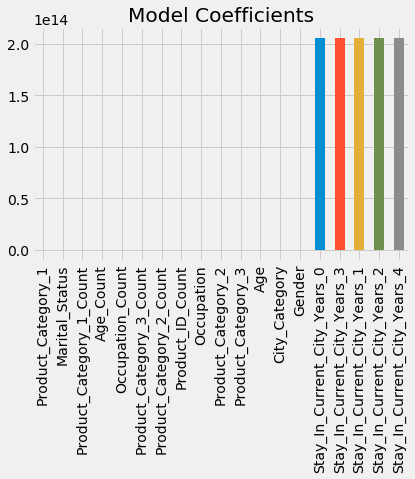

In [57]:
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
linear = modelfit(LR, train_df, test_df, predictors, target, IDcol, 'Dataset/LR.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Modelo Ridge Regression


Model Report
RMSE : 4346
CV Score : Mean - 4346 | Std - 29.91 | Min - 4288 | Max - 4398


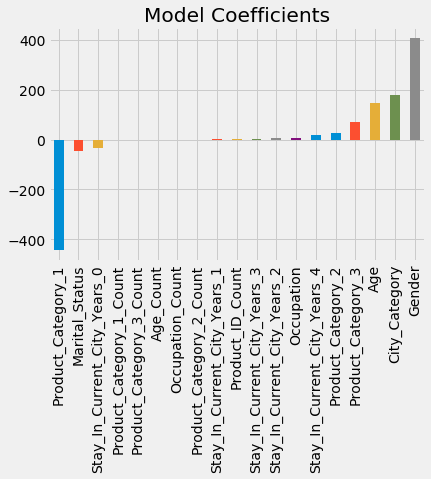

In [58]:
RR = Ridge(alpha=0.05,normalize=True)
ridge = modelfit(RR, train_df, test_df, predictors, target, IDcol, 'Dataset/RR.csv')
coef1 = pd.Series(RR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Modelo Decision Tree


Model Report
RMSE : 2680
CV Score : Mean - 2719 | Std - 18.98 | Min - 2684 | Max - 2749


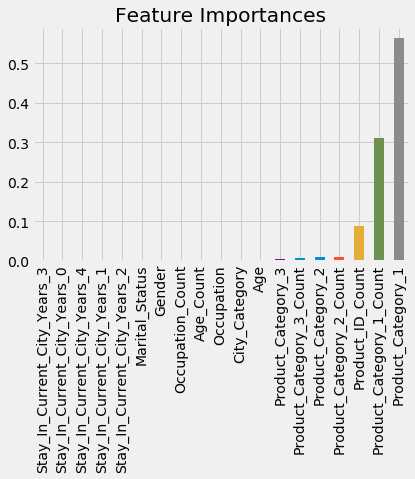

In [59]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
decision_tree = modelfit(DT, train_df, test_df, predictors, target, IDcol, 'Dataset/DT.csv')
coef1 = pd.Series(DT.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importances')

### Modelo Random Forrest

In [60]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=487987)
random = modelfit(RF, train_df, test_df, predictors, target, IDcol, 'Dataset/RF.csv')
coef1 = pd.Series(RF.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importances')

KeyboardInterrupt: 

### Modelo XGBoost 

In [61]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
# make predictions
predictions = my_model.predict(test_df[predictors])
absolut = mean_absolute_error(predictions, test_df[target])
print("Mean Absolute Error : " + str(absolut))
xgboost = np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions))
print("RMSE : %.4f" % xgboost)
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("Dataset/XGBoost.csv", index=False)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Mean Absolute Error : 604.5626861915398
RMSE : 2798.4942


In [62]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 
              'Random Forest', 'XGBoost'],
    'RMSE': [linear, ridge,  
              decision_tree, random, xgboost]})
result_df = results.sort_values(by='RMSE', ascending=True)
result_df = result_df.set_index('RMSE')
result_df

,Model
RMSE,
1483.090181,Random Forest
2680.249795,Decision Tree
2798.494236,XGBoost
4339.166751,Linear Regression
4345.664896,Ridge Regression
